In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [5]:
# %timeit sirve para evaluar el tiempo de ejecucion
df_avisos_detalle = pd.read_csv('../csv/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

# Porcentajes de Avisos por nivel agrupados por Carga Horaria

In [9]:
avisos_x_nivel_y_carga = df_avisos_detalle.groupby(['tipo_de_trabajo', 'nivel_laboral']).size().unstack(fill_value=0)
avisos_nivel_tipo_carga = avisos_x_nivel_y_carga.apply(lambda x: 100 * x / float(x.sum())).round(3)
avisos_nivel_tipo_carga

nivel_laboral,Gerencia / Alta Gerencia / Dirección,Jefe / Supervisor / Responsable,Junior,Otro,Senior / Semi-Senior
tipo_de_trabajo,,,,,
Fines de Semana,0.000,0.000,0.045,0.326,0.106
Full-time,98.895,92.089,80.190,81.542,94.472
Part-time,0.552,0.865,15.794,14.332,3.965
Pasantia,0.000,0.000,2.211,1.086,0.043
Por Contrato,0.000,0.618,0.451,0.543,0.181
Por Horas,0.000,0.124,0.361,1.629,0.415
Primer empleo,0.000,0.000,0.090,0.109,0.000
Teletrabajo,0.552,6.180,0.045,0.109,0.606
Temporario,0.000,0.124,0.812,0.326,0.213


[Text(0.5,0,'Gerencia / Alta Gerencia / Dirección'),
 Text(1.5,0,'Jefe / Supervisor / Responsable'),
 Text(2.5,0,'Junior'),
 Text(3.5,0,'Otro'),
 Text(4.5,0,'Senior / Semi-Senior')]

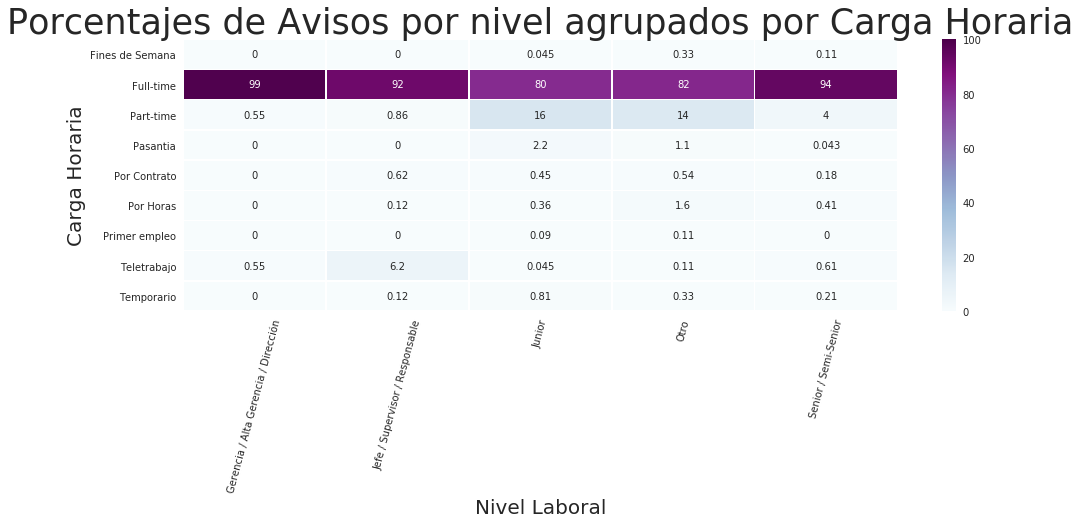

In [16]:
plt.figure(figsize = (16,5))
avisos_heatMap = sns.heatmap(avisos_nivel_tipo_carga,vmin=0,vmax=100, cmap='BuPu', linewidths=0.5, annot=True)
avisos_heatMap.set_ylabel("Carga Horaria", fontsize = 20)
avisos_heatMap.set_xlabel("Nivel Laboral", fontsize = 20)
avisos_heatMap.set_title("Porcentajes de Avisos por nivel agrupados por Carga Horaria", fontsize = 35)
avisos_heatMap.set_xticklabels(labels = avisos_nivel_tipo_carga.columns.values, rotation=75)

# Porcentajes de Avisos por carga horaria, agrupados por nivel

In [23]:
avisos_x_carga_y_nivel = df_avisos_detalle.groupby(['nivel_laboral','tipo_de_trabajo']).size().unstack(fill_value=0)
avisos_nivel_carga_tipo = avisos_x_carga_y_nivel.apply(lambda x: 100 * x / float(x.sum())).round(3)
avisos_x_carga_y_nivel
avisos_nivel_carga_tipo

tipo_de_trabajo,Fines de Semana,Full-time,Part-time,Pasantia,Por Contrato,Por Horas,Primer empleo,Teletrabajo,Temporario
nivel_laboral,,,,,,,,,
Gerencia / Alta Gerencia / Dirección,0.000,1.451,0.116,0.000,0.000,0.000,0.000,0.909,0.000
Jefe / Supervisor / Responsable,0.000,6.038,0.811,0.000,13.514,1.587,0.000,45.455,2.381
Junior,7.143,14.401,40.556,77.778,27.027,12.698,66.667,0.909,42.857
Otro,21.429,6.086,15.295,15.873,13.514,23.810,33.333,0.909,7.143
Senior / Semi-Senior,71.429,72.024,43.221,6.349,45.946,61.905,0.000,51.818,47.619


[Text(0.5,0,'Fines de Semana'),
 Text(1.5,0,'Full-time'),
 Text(2.5,0,'Part-time'),
 Text(3.5,0,'Pasantia'),
 Text(4.5,0,'Por Contrato'),
 Text(5.5,0,'Por Horas'),
 Text(6.5,0,'Primer empleo'),
 Text(7.5,0,'Teletrabajo'),
 Text(8.5,0,'Temporario')]

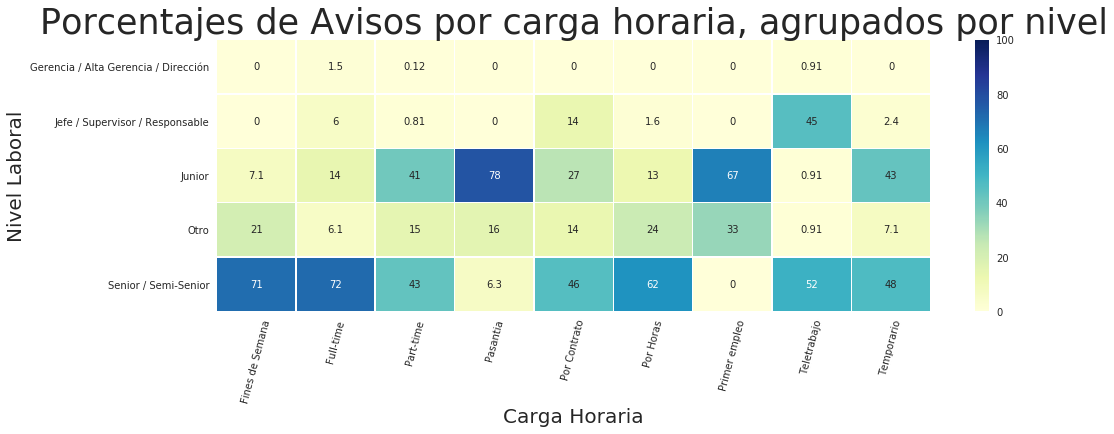

In [24]:
plt.figure(figsize = (16,5))
avisos_heatMap = sns.heatmap(avisos_nivel_carga_tipo,vmin=0,vmax=100, cmap='YlGnBu', linewidths=0.5, annot=True)
avisos_heatMap.set_xlabel("Carga Horaria", fontsize = 20)
avisos_heatMap.set_ylabel("Nivel Laboral", fontsize = 20)
avisos_heatMap.set_title("Porcentajes de Avisos por carga horaria, agrupados por nivel", fontsize = 35)
avisos_heatMap.set_xticklabels(labels = avisos_nivel_carga_tipo.columns.values, rotation=75)